# Pollard's p-1 algorithm

## Helper functions

### Greatest Common Divisor (GCD)

Computes the greatest common divisor (GCD) of two numbers 𝑎 and 𝑏 using the Euclidean algorithm.

In [2]:
def gcd(a, b):
    """Greatest Common Divisor using the Euclidean algorithm."""
    while b:
        a, b = b, a % b
    return a

# Example
print(gcd(36, 64))

4


### Least Common Multiple (LCM)

Computes the least common multiple (LCM) of two numbers 𝑎 and 𝑏.

In [5]:
def lcm(a, b):
    """Least Common Multiple of a and b."""
    return abs(a * b) // gcd(a, b)

# Example
print(lcm(3,7))

21


In order to calculate the Least Common Multiple from 1 to B I use an extended LCM function.

In [6]:
def lcm_up_to(B):
    """Compute the LCM of numbers from 1 to B."""
    result = 1
    for i in range(1, B + 1):
        result = lcm(result, i)
    return result

# Example
print(lcm_up_to(12))

27720


### Modular Exponentiation

Uses the method of "exponentiation by squaring" to reduce the number of multiplications. This approach is much faster than directly computing large powers.

In [9]:
def modular_exponentiation(base, exponent, mod):
    """Efficient modular exponentiation: (base^exponent) % mod."""
    result = 1
    base = base % mod
    while exponent > 0:
        if exponent % 2 == 1:  # If exponent is odd
            result = (result * base) % mod
        exponent //= 2  # Divide exponent by 2
        base = (base * base) % mod
    return result

# Example
print(modular_exponentiation(2, 5, 11))

10


### Formatting table to detail the steps

This function ensures that the algorithm's process is visualized into a more readable, table form.

In [22]:
def print_table(steps_data):
    """Print a formatted table of steps, with headers printed once."""
    # Print table headers
    print("+------------------+-------------------------------+--------+")
    print("|       Step       |          Description          | Result |")
    print("+------------------+-------------------------------+--------+")

    # Print each step's data
    for step in steps_data:
        print(f"| {step['Step']:<16} | {step['Description']:<30} | {step['Result']:<6} |")
    print("+------------------+-------------------------------+--------+")

## Main function

### P-1 algorithm

Implements the Pollard's p-1 factorization algorithm using a fixed smoothness bound 𝐵 the way the following pseudocode shows.

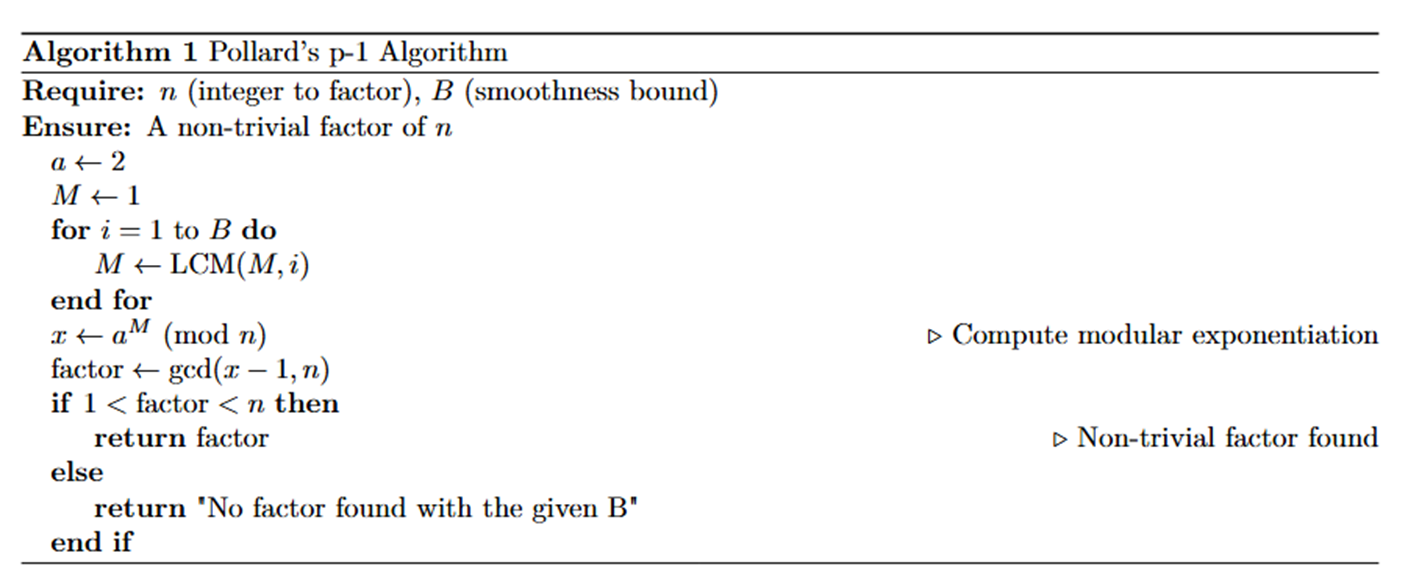

In [27]:
def pollards_p_minus_1_with_steps(n, B):
    """Pollard p-1 algorithm with detailed steps for visualization."""
    steps_data = []  # To store step-by-step data for visualization
    
    # Step 1: Initialize 'a'
    a = 2  # Starting small integer (commonly 2)
    steps_data.append({
        "Step": "Initialize a",
        "Description": "Set a to 2",
        "Result": a
    })

    # Step 2: Compute LCM of numbers up to B
    M = lcm_up_to(B)
    steps_data.append({
        "Step": "Compute LCM",
        "Description": f"LCM of integers from 1 to {B}",
        "Result": M
    })

    # Step 3: Calculate a^M mod n
    x = modular_exponentiation(a, M, n)
    steps_data.append({
        "Step": "Compute a^M mod n",
        "Description": f"Calculate {a}^{M} mod {n}",
        "Result": x
    })

    # Step 4: Calculate gcd(x - 1, n)
    factor = gcd(x - 1, n)
    steps_data.append({
        "Step": "Compute GCD",
        "Description": f"gcd({x} - 1, {n})",
        "Result": factor
    })

    # Display the results using a single call to print_table
    print_table(steps_data)

    # Return the factor found (if any)
    if 1 < factor < n:
        return f"A non-trivial factor of {n} is {factor}."
    return "No factor found with the given B."

# Example
print("Example 1\n")
result = pollards_p_minus_1_with_steps(91, 3)
print(f"Result: {result}\n")

print("Example 2\n")

# Example of no factor found
result = pollards_p_minus_1_with_steps(91, 2)
print(f"Result: {result}")

Example 1

+------------------+-------------------------------+--------+
|       Step       |          Description          | Result |
+------------------+-------------------------------+--------+
| Initialize a     | Set a to 2                     | 2      |
| Compute LCM      | LCM of integers from 1 to 3    | 6      |
| Compute a^M mod n | Calculate 2^6 mod 91           | 64     |
| Compute GCD      | gcd(64 - 1, 91)                | 7      |
+------------------+-------------------------------+--------+
Result: A non-trivial factor of 91 is 7.

Example 2

+------------------+-------------------------------+--------+
|       Step       |          Description          | Result |
+------------------+-------------------------------+--------+
| Initialize a     | Set a to 2                     | 2      |
| Compute LCM      | LCM of integers from 1 to 2    | 2      |
| Compute a^M mod n | Calculate 2^2 mod 91           | 4      |
| Compute GCD      | gcd(4 - 1, 91)                 | 1    